# Business Task

Our objective is to analyze data on over 1,000 unicorn companies, those valued at over one billion dollars, to provide actionable insights to an investing firm. The goal is to understand patterns and factors that contribute to companies achieving unicorn status, thereby informing and optimizing the firm's future investment strategies. We will deliver recommendations based on these insights to help the firm identify high-potential companies and investment opportunities.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
companies = pd.read_csv("Unicorn_Companies.csv")

## Data exploration 

In [3]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
np.size(companies)

10740

In [5]:
np.shape(companies)

(1074, 10)

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [7]:
companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [8]:
companies.duplicated().sum()

0

In [9]:
companies.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [10]:
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [11]:
companies['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

In [12]:
companies['Continent'].unique()

array(['Asia', 'North America', 'Europe', 'Oceania', 'South America',
       'Africa'], dtype=object)

In [13]:
companies['Continent'].value_counts()

North America    589
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: Continent, dtype: int64

In [14]:
companies['Country/Region'].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Bahamas', 'India', 'Indonesia', 'Turkey', 'Estonia', 'Germany',
       'Hong Kong', 'South Korea', 'Mexico', 'Canada', 'Netherlands',
       'France', 'Finland', 'Israel', 'Lithuania', 'Denmark', 'Belgium',
       'Colombia', 'Brazil', 'Singapore', 'Austria', 'Ireland',
       'United Arab Emirates', 'Switzerland', 'Vietnam', 'South Africa',
       'Thailand', 'Norway', 'Chile', 'Argentina', 'Bermuda', 'Japan',
       'Spain', 'Malaysia', 'Senegal', 'Philippines', 'Luxembourg',
       'Nigeria', 'Czech Republic', 'Croatia', 'Italy'], dtype=object)

## Data Cleaning

In [15]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
companies.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [16]:
companies['Industry'] = companies['Industry'].replace('Artificial intelligence', 'Artificial Intelligence')
companies['Industry'].unique()

array(['Artificial Intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications'], dtype=object)

In [17]:
companies['City'] = companies['City'].fillna('Unknown')
companies['Select Investors'] = companies['Select Investors'].fillna('Unknown')

companies.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country/Region      0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [18]:
companies[companies['Funding'] == 'Unknown'].head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
215,SSENSE,$4B,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,Unknown,Sequoia Capital
424,Uplight,$2B,2021-03-03,Other,Boulder,United States,North America,2019,Unknown,"Rubicon Technology Partners, Max Ventures, Inc..."
567,ISN,$2B,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,Unknown,Blackstone
639,SITECH DEV,$1B,2019-05-16,Other,Guiyang,China,Asia,2017,Unknown,China Prosperity Capital
651,Xiaobing,$1B,2021-07-12,Fintech,Beijing,China,Asia,2020,Unknown,"NetEase Capital, Northern Light Venture Capita..."


In [19]:
companies['Funding'] = companies['Funding'].replace('Unknown', '0')

In [20]:
companies[companies['Funding'] == 'Unknown'].head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors


In [21]:
companies[companies['Funding'] == '0'].head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
215,SSENSE,$4B,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,0,Sequoia Capital
424,Uplight,$2B,2021-03-03,Other,Boulder,United States,North America,2019,0,"Rubicon Technology Partners, Max Ventures, Inc..."
567,ISN,$2B,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,0,Blackstone
639,SITECH DEV,$1B,2019-05-16,Other,Guiyang,China,Asia,2017,0,China Prosperity Capital
651,Xiaobing,$1B,2021-07-12,Fintech,Beijing,China,Asia,2020,0,"NetEase Capital, Northern Light Venture Capita..."


In [22]:
def valuation_to_num(valuation_str):
    valuation_str = valuation_str.replace('$', '').strip()
    numeric_part = ''.join(x for x in valuation_str if x.isdigit() or x == '.')
    scale = valuation_str[-1].upper() 

    numeric_value = float(numeric_part)
    if scale == 'B':
        valuation_float = numeric_value * 1e9
    elif scale == 'M':
        valuation_float = numeric_value * 1e6
    else:
        raise ValueError(f'Invalid scale: {scale}')
        
    return valuation_float

companies['Valuation float'] = companies['Valuation'].apply(valuation_to_num)


In [23]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation float
0,Bytedance,$180B,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",1.800000e+11
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1.000000e+11
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",1.000000e+11
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",9.500000e+10
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",4.600000e+10


In [24]:
def funding_to_num(funding_str):
    funding_num = funding_str.replace('$', '').strip()
    numeric_part = ''.join(x for x in funding_str if x.isdigit() or x == '.')
    scale = funding_num[-1].upper()
    
    numeric_value = float(numeric_part)
    if  scale == 'B':
        funding_float = numeric_value * 1e9
    elif scale == 'M':
        funding_float = numeric_value * 1e6
    elif scale == '0':
        funding_float = 0.0
    else:
        raise ValueError(f'Invalid scale: {scale}')
        
    return funding_float

companies['Funding float'] = companies['Funding'].apply(funding_to_num)
    
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Valuation float,Funding float
0,Bytedance,$180B,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",1.800000e+11,8.000000e+09
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1.000000e+11,7.000000e+09
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",1.000000e+11,2.000000e+09
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",9.500000e+10,2.000000e+09
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",4.600000e+10,4.000000e+09


In [ ]:
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded'] 
companies.head()

In [ ]:
companies['Years To Unicorn'].describe()

In [ ]:
negative_value = companies[companies['Years To Unicorn'] < 0]
negative_value

There is only one row that contains a negative value,-4 to be exact , and the name of the company is Yidian Zixun, it develops personalized news app and is based in beijing China .An internet search revealed that Yidian Zixun was founded in 2013 so i'll be replacing the value at `Year Founded` with `2013` for Yidian Zixun's row. 

In [ ]:
companies.loc[714,'Year Founded'] = 2013

In [ ]:
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded'] 

companies['Years To Unicorn'].describe()

## Analysis and Visualization

In [25]:
top_val = companies.sort_values(by = 'Valuation float', ascending = False)
top_10_companies = top_val.head(10)
top_10_companies[['Company','Valuation float']]

,Company,Valuation float
0,Bytedance,1.800000e+11
1,SpaceX,1.000000e+11
2,SHEIN,1.000000e+11
3,Stripe,9.500000e+10
4,Klarna,4.600000e+10
5,Canva,4.000000e+10
6,Checkout.com,4.000000e+10
7,Instacart,3.900000e+10
8,JUUL Labs,3.800000e+10
9,Databricks,3.800000e+10


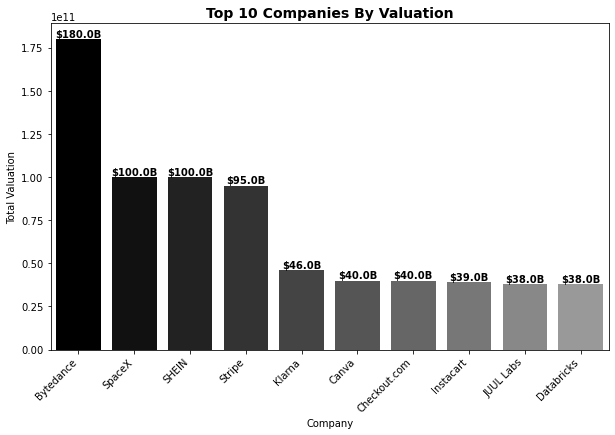

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))


sns.barplot(x="Company", y="Valuation float", data=top_10_companies, palette=['#000000', '#111111', '#222222', '#333333',  '#444444', '#555555', '#666666', '#777777', '#888888', '#999999'], ax=ax)

for index, row in top_10_companies.iterrows():
    valuation = row["Valuation float"]
    if valuation >= 1e9:
        label = f"${valuation/1e9:.1f}B"
    else:
        label = f"${valuation/1e6:.1f}M"
    ax.text(index, valuation, label, ha="center", va="bottom", fontsize=10, color="black", fontweight='bold')

ax.set(xlabel="Company", ylabel="Total Valuation")
plt.title("Top 10 Companies By Valuation", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.show()


In [27]:
avg_val_industry = companies.groupby('Industry')['Valuation float'].mean().sort_values(ascending = False)

def format_valuation(x):
    if x >= 1e9:
        return f"${x/1e9:.1f}B"
    else:
        return f"${x/1e6:.1f}M"
    
average_valuation_per_industry = avg_val_industry.apply(format_valuation)
average_valuation_per_industry

Industry
Artificial Intelligence                $4.5B
Other                                  $4.3B
Consumer & retail                      $4.2B
Fintech                                $3.9B
E-commerce & direct-to-consumer        $3.8B
Edtech                                 $3.6B
Data management & analytics            $3.3B
Travel                                 $3.3B
Auto & transportation                  $3.2B
Supply chain, logistics, & delivery    $3.1B
Hardware                               $2.9B
Internet software & services           $2.9B
Health                                 $2.7B
Cybersecurity                          $2.6B
Mobile & telecommunications            $2.3B
Name: Valuation float, dtype: object

In [28]:
company_in_industry = companies['Industry'].value_counts().reset_index()
company_in_industry.columns = ['Industry','No of companies']
company_in_industry

,Industry,No of companies
0,Fintech,224
1,Internet software & services,205
2,E-commerce & direct-to-consumer,111
3,Artificial Intelligence,84
4,Health,74
5,Other,58
6,"Supply chain, logistics, & delivery",57
7,Cybersecurity,50
8,Data management & analytics,41
9,Mobile & telecommunications,38


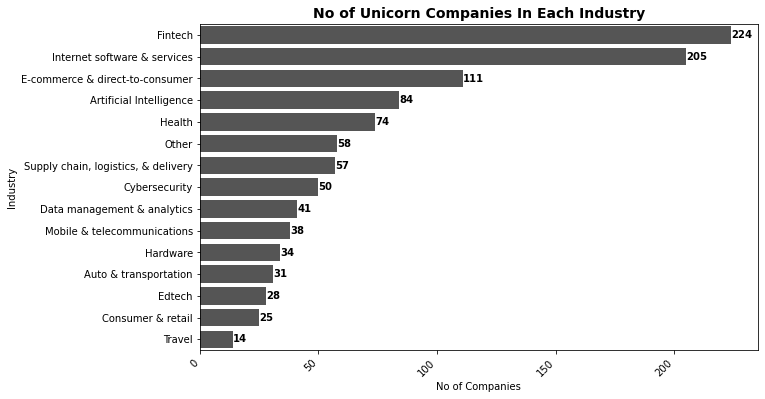

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))


sns.barplot(y='Industry', x='No of companies' ,data=company_in_industry, palette=['#555555'], ax=ax)

for index, row in company_in_industry.iterrows():
    ax.text(row['No of companies'], index, row['No of companies'], color='black',va="center", fontweight='bold')

ax.set(xlabel="No of Companies", ylabel="Industry")
plt.title("No of Unicorn Companies In Each Industry", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.show()

In [30]:
top_company_fund = companies.groupby('Company')['Funding float'].sum().sort_values(ascending= False).head(10)
top_company_fund

Company
JUUL Labs             1.400000e+10
Bytedance             8.000000e+09
Epic Games            7.000000e+09
SpaceX                7.000000e+09
Global Switch         5.000000e+09
Xingsheng Selected    5.000000e+09
Swiggy                5.000000e+09
J&T Express           5.000000e+09
BYJU's                4.000000e+09
Ola Cabs              4.000000e+09
Name: Funding float, dtype: float64

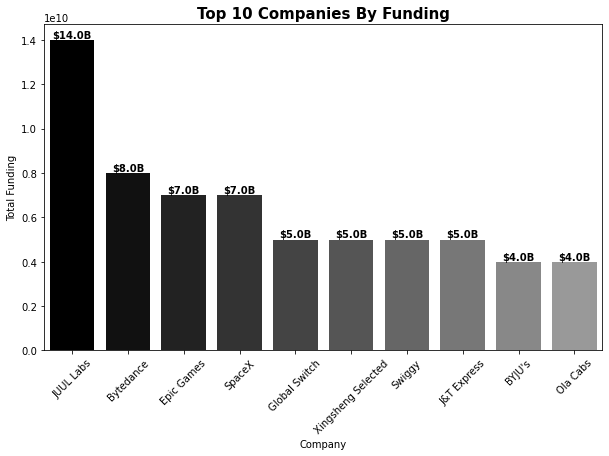

In [31]:
plt.figure(figsize=(10, 6)) 

custom_palette = ['#000000', '#111111', '#222222', '#333333',  '#444444', '#555555', '#666666', '#777777', '#888888', '#999999']

ax = sns.barplot(x=top_company_fund.index, y=top_company_fund, palette=custom_palette)

# Add 'Total Funding' labels to the bars with custom formatting
for index, value in enumerate(top_company_fund):
    if value >= 1e9:
        label = f"${value/1e9:.1f}B"
    else:
        label = f"${value/1e6:.1f}M"
    ax.text(index, value, label, ha="center", va="bottom", fontsize=10, color="black", fontweight='bold')

# Customize the plot
ax.set(xlabel="Company", ylabel="Total Funding")
plt.title("Top 10 Companies By Funding", fontsize=15, fontweight='bold')
plt.xticks(rotation=45)

plt.show()


In [32]:
company_in_country = companies['Country/Region'].value_counts().reset_index().head(5)
company_in_country.columns = ['Country','No of companies']
company_in_country

,Country,No of companies
0,United States,562
1,China,173
2,India,65
3,United Kingdom,43
4,Germany,26


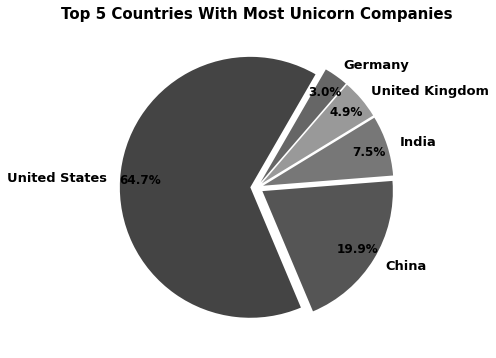

In [33]:
labels = company_in_country['Country']
company = company_in_country['No of companies']
colours = ['#444444', '#555555', '#777777','#999999','#666666']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.figure(figsize=(10, 6)) 
_, texts, autotexts = plt.pie(company,
                      colors = colours,
                      labels=labels,
                      autopct='%1.1f%%', 
                      pctdistance=0.85,
                      explode=explode,
                      startangle=60)

for autotext in autotexts:
    autotext.set (color='black', fontsize=12, fontweight='bold')
[text.set(color='black', fontsize=13, fontweight='bold') for text in texts]
    
plt.title('Top 5 Countries With Most Unicorn Companies',fontsize=15, fontweight='bold')


plt.show()

In [34]:
company_in_continent = companies['Continent'].value_counts().reset_index()
company_in_continent.columns = ['Continent','No of companies']
company_in_continent


,Continent,No of companies
0,North America,589
1,Asia,310
2,Europe,143
3,South America,21
4,Oceania,8
5,Africa,3


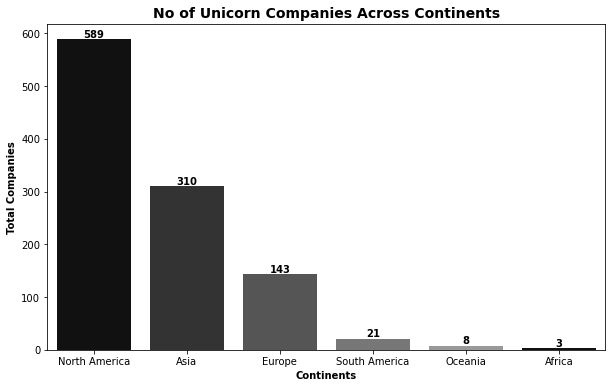

In [35]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Continent',
                y= 'No of companies',
                data= company_in_continent,
                palette=['#111111','#333333', '#555555','#777777','#999999'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=10, fontweight='bold', color='black')


plt.xlabel("Continents",fontsize=10, fontweight= 'bold')
plt.ylabel("Total Companies",fontsize=10, fontweight= 'bold')
plt.title("No of Unicorn Companies Across Continents", fontsize=14, fontweight='bold')

    
plt.show()

In [36]:
companies['Year Founded'].unique()
companies['Company'].groupby(companies['Year Founded']).count().reset_index(name = 'No of companies found')

,Year Founded,No of companies found
0,1919,1
1,1979,1
2,1984,1
3,1990,1
4,1991,1
5,1992,1
6,1993,1
7,1994,2
8,1995,2
9,1996,1


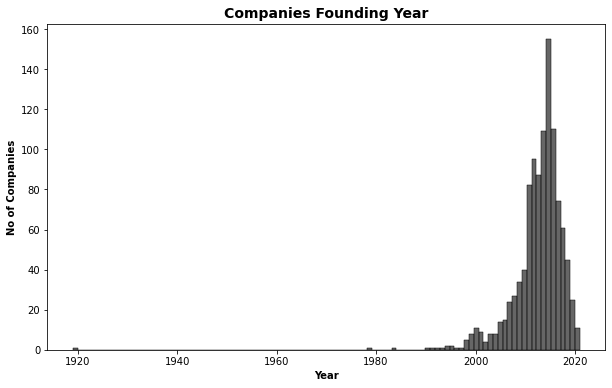

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data = companies, 
             x = 'Year Founded',
            color = '#333333')
plt.xlabel("Year",fontsize=10, fontweight= 'bold')
plt.ylabel("No of Companies",fontsize=10, fontweight= 'bold')
plt.title('Companies Founding Year',fontsize=14, fontweight='bold');

In [38]:
top_val = companies.groupby('Industry')['Valuation float'].sum().sort_values(ascending = False).reset_index().head(5)
top_val.columns=['Industry','Valuation']
top_val

,Industry,Valuation
0,Fintech,8.820000e+11
1,Internet software & services,5.950000e+11
2,E-commerce & direct-to-consumer,4.260000e+11
3,Artificial Intelligence,3.770000e+11
4,Other,2.520000e+11


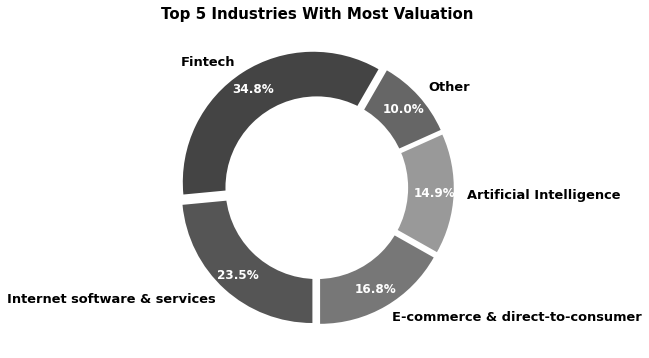

In [39]:
labels = top_val['Industry']
valuation = top_val['Valuation']
colours = ['#444444', '#555555', '#777777','#999999','#666666']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.figure(figsize=(10, 6)) 
pie,texts, autotexts = plt.pie(valuation,
                               colors = colours,
                               labels=labels,
                               autopct='%1.1f%%',
                               pctdistance=0.85,
                               explode=explode,
                               startangle=60)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
fig.gca().add_artist(centre_circle)

for autotext in autotexts:
    autotext.set (color='white', fontsize=12, fontweight='bold')
[text.set(color='black', fontsize=13, fontweight='bold') for text in texts]
    
plt.title('Top 5 Industries With Most Valuation',fontsize=15, fontweight='bold')


plt.show()

In [40]:
investors_list = companies['Select Investors'].str.split(', ')

investors_expanded = investors_list.explode().reset_index(drop=True)

investor_counts = investors_expanded.value_counts().reset_index().head(5)
investor_counts.columns = ['Investor', 'Count']

frequent_investors = investor_counts[investor_counts['Count'] > 1]

print(frequent_investors)

                  Investor  Count
0                    Accel     60
1  Tiger Global Management     53
2      Andreessen Horowitz     53
3    Sequoia Capital China     48
4         Insight Partners     47


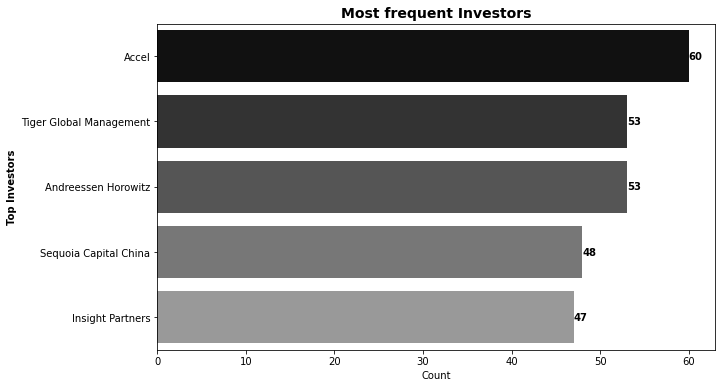

In [56]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(y= 'Investor',
                 x= 'Count',
                 data = investor_counts,
                 palette=['#111111','#333333', '#555555','#777777','#999999'])

for index, row in investor_counts.iterrows():
    ax.text(row['Count'], index, row['Count'], color='black',va="center", fontweight='bold')

plt.ylabel("Top Investors",fontsize=10, fontweight= 'bold')
plt.title("Most frequent Investors", fontsize=14, fontweight='bold')
plt.show()

In [54]:
companies_grouped = companies[["Industry","Years To Unicorn"]].groupby('Industry').max().sort_values(by ='Years To Unicorn')
companies_grouped

,Years To Unicorn
Industry,
Auto & transportation,14
Travel,14
Artificial Intelligence,15
Edtech,17
Hardware,18
Mobile & telecommunications,20
"Supply chain, logistics, & delivery",20
Cybersecurity,21
Internet software & services,21


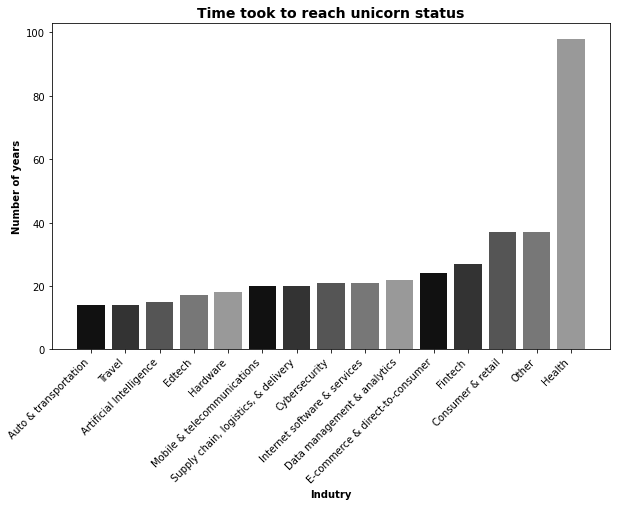

In [58]:
colours = ['#111111','#333333', '#555555','#777777','#999999']
plt.figure(figsize=(10, 6))
plt.bar(x =companies_grouped.index,
        height=companies_grouped['Years To Unicorn'],
       color = colours)


plt.xlabel("Indutry",fontsize=10, fontweight= 'bold')
plt.ylabel("Number of years",fontsize=10, fontweight= 'bold')
plt.title("Time took to reach unicorn status", fontsize=14, fontweight='bold')

plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

## Recommendation

The analysis of the unicorn companies' dataset provides a range of insights that can help guide strategic investment decisions. Below are detailed recommendations derived from the data, aimed at maximizing stakeholder returns:

   - The data clearly shows that a substantial number of unicorn companies are concentrated within the fintech industry. This suggests that fintech is a fertile ground for innovation and growth. By focusing investments in the fintech sector, stakeholders are likely to tap into opportunities that not only promise high returns but also contribute to the transformation of global financial systems.


   - ByteDance, the leading company by valuation, exemplifies the potential of the artificial intelligence (AI) industry. AI is increasingly becoming the backbone of technological innovation, powering applications ranging from machine learning and data analytics to robotics and autonomous systems. Investing in AI not only aligns with current technological trends but also positions stakeholders at the forefront of the next industrial revolution. The AI industry’s capacity to revolutionize various sectors, including healthcare, finance, and logistics, makes it a compelling choice for long-term investment.
  
  
   - The United States emerges as a dominant player in the unicorn landscape, hosting a majority of the companies in our dataset. For stakeholders, prioritizing investments in U.S.-based industries could be particularly advantageous. Not only does this region offer a stable economic environment, but it also provides access to a vast market and cutting-edge research and development capabilities. By leveraging these factors, stakeholders can increase their chances of backing companies with strong growth trajectories and global market reach.


   - North America, as a continent, is home to the largest number of unicorn companies, further emphasizing its role as a hub of innovation and technological advancement. While the current dataset does not provide granular details on the specific factors driving this concentration, factors such as regulatory support, access to funding, and technological infrastructure are likely contributors. By gaining a deeper understanding of these elements, we can make more informed decisions and potentially uncover emerging opportunities within the region.


   - The period between 2011 and 2015 stands out as a particularly fertile time for the founding of unicorn companies. This trend may be attributed to various factors, including the post-financial crisis economic recovery, advancements in digital technology, and the rise of consumer internet businesses. To replicate the success of these companies,  in-depth analyses of the business models, growth strategies, and market conditions that enabled these firms to achieve rapid unicorn status should be conducted. Understanding the commonalities among these companies could provide valuable insights into identifying and nurturing the next wave of high-growth startups.


   - The industries with the highest average valuations—fintech, internet software and services, e-commerce, and artificial intelligence—represent areas of significant growth and market leadership. Each of these sectors is driven by transformative trends, such as the digitalization of financial services, the expansion of online marketplaces, and the increasing integration of AI into various aspects of business and daily life. By diversifying investments across these industries, stakeholders can hedge against sector-specific risks while capitalizing on the overall growth potential of these high-performing markets.


   - Our analysis shows that companies within the auto and transportation sector tend to reach unicorn status more quickly than those in other industries. This finding suggests that these companies are often at the forefront of innovation, particularly in areas such as electric vehicles, autonomous driving, and sustainable transportation solutions. For stakeholders looking for quicker returns, investing in the auto and transportation industry could be a strategic move. However, it's important to balance these investments with a long-term perspective, as the industry also faces challenges related to regulation, infrastructure, and market adoption.


   - While the health industry has the potential for substantial impact and growth, it also presents unique challenges that can result in longer timelines to reach unicorn status. Factors such as stringent regulatory requirements, the complexity of developing new medical technologies, and the necessity for extensive clinical trials contribute to this extended timeline. Stakeholders interested in this sector should be prepared for a longer investment horizon and should consider strategies that mitigate risk, such as investing in companies with proven technologies or those that have already navigated significant regulatory hurdles. Alternatively, co-investing with partners who have domain expertise in healthcare can also reduce risks and enhance the likelihood of successful outcomes.


### Conclusion:
By carefully considering these recommendations, stakeholders can make informed investment decisions that align with market trends and the evolving landscape of unicorn companies. Each recommendation is backed by data-driven insights, ensuring that stakeholders are well-positioned to maximize returns while minimizing risks. Further research and continuous monitoring of industry developments are advised to refine these strategies and adapt to emerging opportunities.